In [19]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import platform
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from matplotlib import rcParams
import csv
import matplotlib.ticker as ticker
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
# -------------------- 1. 기본 설정 --------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


total22_df = pd.read_csv("전연령22_utf8.csv", low_memory=False)
senior22_df = pd.read_csv("노인승하차22_utf8.csv", low_memory=False)
total24_df = pd.read_csv("전연령24_utf8.csv", low_memory=False)
senior24_df = pd.read_csv("노인승하차24_utf8.csv", low_memory=False)
total23_df = pd.read_csv("전연령23_utf8.csv", low_memory=False)
senior23_df = pd.read_csv("노인승하차23_utf8.csv", low_memory=False)
#senior_care_df = pd.read_csv("senior_care_utf8.csv", low_memory=False) # 파일이 사라짐
sme_df = pd.read_csv("sme.csv", low_memory=False)
park_df = pd.read_csv("TB_PTP_PRK_M.csv", low_memory=False)
safety_df = pd.read_csv("안전사고_utf.csv", low_memory=False)
elderly_2020_2022 = pd.read_csv(
    "elderly2020_2022.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'  # 문제 있는 라인은 건너뜀
)
elderly_2023_2025 = pd.read_csv(
    "elderly2023_2025.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'
)
weather_raw = pd.read_csv("weath20_25_utf8.csv", encoding='utf-8')
rain_raw = pd.read_csv("rain20_25_utf8.csv", encoding='utf-8') # 강수량 파일명 확인 필요

import io
rain_csv_data = """년월,지점,강수량(mm)
2020-01,108,60.5
2020-02,108,53.1
2020-03,108,16.3
2020-04,108,16.9
2020-05,108,112.4
2020-06,108,139.6
2020-07,108,270.4
2020-08,108,675.7
2020-09,108,181.5
2020-10,108,0
2020-11,108,120.1
2020-12,108,4.6
2021-01,108,18.9
2021-02,108,7.1
2021-03,108,110.9
2021-04,108,124.1
2021-05,108,183.1
2021-06,108,104.6
2021-07,108,168.3
2021-08,108,211.2
2021-09,108,131
2021-10,108,57
2021-11,108,62.4
2021-12,108,7.9
2022-01,108,5.5
2022-02,108,4.7
2022-03,108,102.6
2022-04,108,20.4
2022-05,108,7.5
2022-06,108,393.8
2022-07,108,252.3
2022-08,108,564.8
2022-09,108,201.5
2022-10,108,124.1
2022-11,108,84.5
2022-12,108,13.6
2023-01,108,47.9
2023-02,108,1
2023-03,108,10.5
2023-04,108,96.9
2023-05,108,155.6
2023-06,108,195.6
2023-07,108,459.9
2023-08,108,298.1
2023-09,108,134.5
2023-10,108,31
2023-11,108,81.9
2023-12,108,85.9
2024-01,108,18.9
2024-02,108,74.7
2024-03,108,29.9
2024-04,108,33.2
2024-05,108,125.1
2024-06,108,115.9
2024-07,108,557.3
2024-08,108,72.8
2024-09,108,143.9
2024-10,108,74
2024-11,108,60
2024-12,108,5.7
2025-01,108,19.5
2025-02,108,5.2
2025-03,108,38.2
2025-04,108,94.6
2025-05,108,123.6
2025-06,108,98.1
2025-07,108,293.9
2025-08,108,290.3
2025-09,108,370.7
2025-10,108,186.3
2025-11,108,2.9"""

# 2. 기온 데이터 (Temp)
weather_csv_data = """년월,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
2020-01,108,1.6,-1.7,5.9
2020-02,108,2.5,-1.3,7.2
2020-03,108,7.7,2.6,13.3
2020-04,108,11.1,6.3,16.6
2020-05,108,18,13.7,23.3
2020-06,108,23.9,19.9,29
2020-07,108,24.1,21.1,28
2020-08,108,26.5,24.4,29.3
2020-09,108,21.4,18,25.6
2020-10,108,14.3,9.6,19.5
2020-11,108,8,4,12.6
2020-12,108,-0.3,-4.2,3.9
2021-01,108,-2.4,-6.8,2.2
2021-02,108,2.7,-2.2,7.9
2021-03,108,9,4.3,14.8
2021-04,108,14.2,9.5,19.5
2021-05,108,17.1,12.8,21.9
2021-06,108,22.8,18.9,27.6
2021-07,108,28.1,24.6,32.2
2021-08,108,25.9,22.8,29.7
2021-09,108,22.6,18.8,26.9
2021-10,108,15.6,11.6,20.5
2021-11,108,8.2,4,13.1
2021-12,108,0.6,-3.5,5.1
2022-01,108,-2.2,-6.2,2.6
2022-02,108,-1.1,-5.3,3.8
2022-03,108,7.7,3.2,12.7
2022-04,108,14.8,10,20.6
2022-05,108,19.1,13.9,25
2022-06,108,23.3,19.8,27.5
2022-07,108,27.3,24.2,31
2022-08,108,25.7,23.1,28.9
2022-09,108,22.4,18.2,27.2
2022-10,108,14.6,10.3,19.7
2022-11,108,10,5.6,15.4
2022-12,108,-2.8,-6.6,1.7
2023-01,108,-1.5,-5.7,3.2
2023-02,108,2.3,-1.9,7.3
2023-03,108,9.8,4.2,16.2
2023-04,108,13.8,8.8,19
2023-05,108,19.5,14.6,25
2023-06,108,23.4,19.7,27.9
2023-07,108,26.7,23.9,30.2
2023-08,108,27.2,24.3,30.8
2023-09,108,23.7,20.2,27.6
2023-10,108,15.8,11.5,21
2023-11,108,6.8,2.9,11.5
2023-12,108,1.1,-2.5,5.2
2024-01,108,-0.5,-3.9,3.6
2024-02,108,3.8,0.2,8.2
2024-03,108,7,2.4,12
2024-04,108,16.3,11.5,22.4
2024-05,108,18.5,13.8,23.7
2024-06,108,24.6,19.9,30.1
2024-07,108,26.6,24.1,29.6
2024-08,108,29.3,26.3,33.3
2024-09,108,25.5,22,29.8
2024-10,108,16.7,12.7,21.4
2024-11,108,9.7,5.5,14.9
2024-12,108,0.8,-2.9,5.3
2025-01,108,-0.4,-4.1,3.9
2025-02,108,-1.2,-5.3,3.9
2025-03,108,8,3.3,13.6
2025-04,108,13.4,8.2,19
2025-05,108,17.8,13.3,22.7
2025-06,108,24,20,28.5
2025-07,108,28.8,25.7,32.6
2025-08,108,28.2,25.3,31.9
2025-09,108,23.5,20.3,27.4
2025-10,108,16.5,13.1,20.4
2025-11,108,,"""
# 역별 승하차인원           => total22_df, total24_df
# 65세 노인 승하차인원      => senior22_df, senior24_df
# 노인요양시설(요양원)      => senior_care_df
# 종사자, 사업체 수         => sme_df
# 안전사고                  => safety_df

# ------------------
# 확인용
# print(total22_df.head())
# print(total22_df.columns)
# print(senior22_df.head())
# print(senior22_df.columns)
# print(safety_df.head())
# print(senior_care_df.head())
# print(senior_care_df.columns)
# print(sme_df.head())
# print(sme_df.columns)
# print(park_df.head())
# ------------------

In [16]:



# ----------------------------------------------------------
# [1] 데이터 준비
# ----------------------------------------------------------
# ※ 주의: 'total_df'는 전체 연령 데이터프레임 변수명입니다. 
# 가지고 계신 전체 데이터 변수명으로 바꿔주세요! (예: subway_2024_df 등)
# total_df가 없다면 senior24_df와 같은 형식으로 로드해주세요.
# ----------------------------------------------------------

# (가정) 전체 데이터가 total_df라고 가정합니다. 
# 만약 전체 데이터 변수명이 다르다면 아래 줄을 수정하세요.
df_total_raw = total24_df.copy() 


# ----------------------------------------------------------
# [1] 데이터 전처리 (비율 계산 로직 추가)
# ----------------------------------------------------------
# ※ 전연령 데이터 변수명을 'total_df'라고 가정합니다. 
# 가지고 계신 변수명(예: subway_total_df)으로 꼭 바꿔주세요!
# ----------------------------------------------------------

time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

def get_time_percentage(df, label):
    # 1. 복사 및 하차 필터링
    temp = df.copy()
    if '승하차구분' in temp.columns:
        temp = temp[temp['승하차구분'] == '하차']
    
    # 2. 숫자 변환
    for col in time_cols:
        if col in temp.columns:
            temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
            
    # 3. 시간대별 합계 계산
    sums = temp[time_cols].sum()
    
    # 4. [핵심] 비율(%)로 변환: (해당시간 인원 / 하루 총 인원) * 100
    total_sum = sums.sum()
    if total_sum == 0: return sums # 0으로 나누기 방지
    
    ratio = (sums / total_sum) * 100
    return ratio

# --- 데이터 계산 ---
# 1. 노인 데이터 비율 계산
senior_ratio = get_time_percentage(senior24_df, "노인")

# 2. 전연령 데이터 비율 계산 (변수명 확인 필요!)
try:
    total_ratio = get_time_percentage(total24_df, "전연령") 
except NameError:
    print("⚠ [주의] 'total_df'가 없습니다. 테스트를 위해 노인 데이터를 살짝 변형해 그립니다.")
    # (테스트용: 실제 데이터가 없을 때만 작동)
    total_ratio = senior_ratio.copy() 
    total_ratio.iloc[3] += 5 # 출근시간 가중치 
    total_ratio.iloc[13] += 5 # 퇴근시간 가중치
    total_ratio = (total_ratio / total_ratio.sum()) * 100

# =========================================================
# [2] 시각화 (단일 축 비교)
# =========================================================
fig = go.Figure()

# [Line 1] 전연령 (회색 점선 - 배경)
fig.add_trace(go.Scatter(
    x=total_ratio.index,
    y=total_ratio.values,
    mode='lines',
    name='전연령 (평균)',
    line=dict(color='gray', width=3, dash='dot'),
    hovertemplate='%{x}<br>전연령 비중: %{y:.1f}%'
))

# [Line 2] 노인 (붉은 실선 - 강조)
fig.add_trace(go.Scatter(
    x=senior_ratio.index,
    y=senior_ratio.values,
    mode='lines+markers',
    name='노인 (65세 이상)',
    line=dict(color='#E63946', width=4),
    marker=dict(size=8, color='#1D3557', line=dict(width=2, color='white')),
    hovertemplate='%{x}<br>노인 비중: %{y:.1f}%'
))

# 피크 타임 표시 (노인)
peak_time = senior_ratio.idxmax()
peak_val = senior_ratio.max()
fig.add_annotation(
    x=peak_time, y=peak_val,
    text=f"<b>노인 활동 피크<br>{peak_val:.1f}%</b>",
    showarrow=True, arrowhead=2, ax=0, ay=-40,
    font=dict(color='#E63946', size=11),
    bgcolor="rgba(255,255,255,0.8)", bordercolor="#E63946"
)

# 레이아웃 설정
fig.update_layout(
    title=dict(
        text="<b>시간대별 지하철 이용 집중도 비교 (단위: % 비율)</b>",
        x=0.5
    ),
    xaxis=dict(
        title="시간대", 
        tickangle=-45,
        gridcolor='#eee'
    ),
    yaxis=dict(
        title="하루 이용량 중 비중 (%)",
        gridcolor='#eee',
        ticksuffix="%" # Y축 숫자에 % 붙이기
    ),
    template="plotly_white",
    hovermode="x unified", # 마우스 올리면 두 선의 값 동시에 비교
    legend=dict(x=0.8, y=0.95, bgcolor='rgba(255,255,255,0.8)')
)

fig.show()

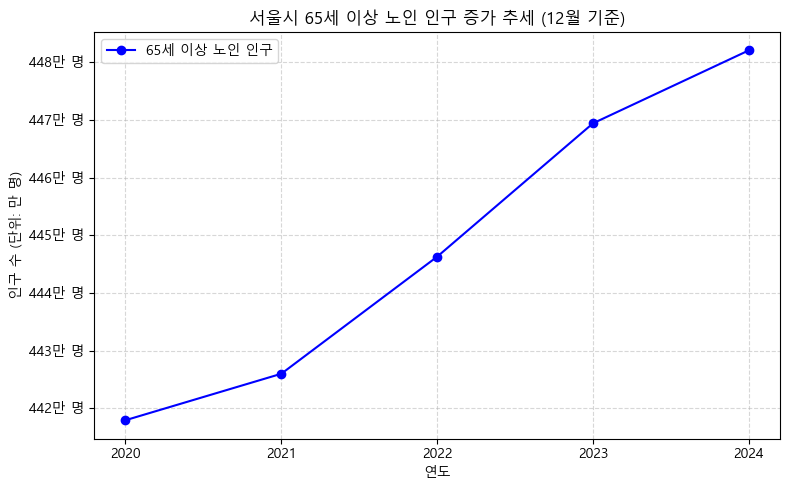

In [2]:

# -------------------------------
# 컬럼명과 문자열 공백 제거
# -------------------------------
for df in [elderly_2020_2022, elderly_2023_2025]:
    df.columns = df.columns.str.replace('"', '').str.strip()
    df['구분별'] = df['구분별'].astype(str).str.replace('"','').str.strip()
    df['동별'] = df['동별'].astype(str).str.replace('"','').str.strip()

# -------------------------------
# 합계 행 필터링
# -------------------------------
sum_2020_2022 = elderly_2020_2022[(elderly_2020_2022['구분별']=='세대') & 
                                  (elderly_2020_2022['동별']=='합계')]
sum_2023_2025 = elderly_2023_2025[(elderly_2023_2025['구분별']=='세대') & 
                                  (elderly_2023_2025['동별']=='합계')]

# -------------------------------
# 12월 데이터 컬럼
# -------------------------------
dec_columns_2020_2022 = ['2020. 12 월', '2021. 12 월', '2022. 12 월']
dec_columns_2023_2025 = ['2023. 12 월', '2024. 12 월']

# -------------------------------
# 문자열 -> 숫자 변환
# -------------------------------
def clean_to_int(series):
    return series.replace(r'[",\s]', '', regex=True).astype(int)

elderly_dec_2020_2022 = clean_to_int(sum_2020_2022[dec_columns_2020_2022].iloc[0])
elderly_dec_2023_2025 = clean_to_int(sum_2023_2025[dec_columns_2023_2025].iloc[0])

# -------------------------------
# 연도별 시리즈 합치기
# -------------------------------
elderly_dec_series = pd.concat([elderly_dec_2020_2022, elderly_dec_2023_2025])
elderly_dec_series.index = [2020, 2021, 2022, 2023, 2024]

# -------------------------------
# [수정됨] 만 단위로 변환 (기존 1e8 -> 10000)
# -------------------------------
values_in_10k = elderly_dec_series.values / 10000

# -------------------------------
# 그래프 그리기
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(elderly_dec_series.index, values_in_10k, marker='o', linestyle='-', color='blue', label='65세 이상 노인 인구')

# [수정됨] y축 숫자 옆에 "만 명" 붙이기, 소수점 제거하고 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}만 명')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('서울시 65세 이상 노인 인구 증가 추세 (12월 기준)')
plt.xlabel('연도')
plt.ylabel('인구 수 (단위: 만 명)') # y축 라벨에도 단위 표시 추가
plt.xticks(elderly_dec_series.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:

# ==========================================
# [1] 데이터 연산 및 전처리 (이전과 동일)
# ==========================================
def process_monthly_demand(df_list, year_list):
    monthly_results = []
    
    time_cols = [
        '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
        '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
        '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
        '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
    ]

    for df in df_list:
        temp_df = df.copy()
        
        # 승차 인원만 필터링
        if '승하차구분' in temp_df.columns:
            temp_df = temp_df[temp_df['승하차구분'] == '승차']
            
        for col in time_cols:
            temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce').fillna(0)
            
        temp_df['일일총승객수'] = temp_df[time_cols].sum(axis=1)
        temp_df['수송일자'] = pd.to_datetime(temp_df['수송일자'])
        
        # 2022년 1월 1일 이후 데이터만 남김
        temp_df = temp_df[temp_df['수송일자'] >= '2022-01-01']

        df_month = temp_df.groupby(temp_df['수송일자'].dt.to_period('M'))['일일총승객수'].sum()
        monthly_results.append(df_month)
    
    total_series = pd.concat(monthly_results).sort_index()
    total_series.index = total_series.index.to_timestamp()
    
    return total_series

# ==========================================
# [2] 함수 실행
# ==========================================
dfs = [senior22_df, senior23_df, senior24_df]
years = ['2022', '2023', '2024']

all_month_data = process_monthly_demand(dfs, years)

# ==========================================
# [3] 시각화 (X축 대각선 + 작은 글씨 적용)
# ==========================================
fig = go.Figure()

# 막대그래프
fig.add_trace(go.Bar(
    x=all_month_data.index,
    y=all_month_data.values,
    name='월별 승차 인원',
    marker_color='skyblue',
    opacity=0.8
))

# 추세선
fig.add_trace(go.Scatter(
    x=all_month_data.index,
    y=all_month_data.values,
    mode='lines+markers',
    name='추세선',
    line=dict(color='crimson', width=3),
    marker=dict(size=6, color='darkred')
))

# Y축 눈금 설정
y_max = all_month_data.max() * 1.15
tick_step = 1000000 
tick_vals = np.arange(0, y_max, tick_step)
tick_texts = [f"{int(v/10000)}만" for v in tick_vals]

fig.update_layout(
    title="<b>2022~2024년 월별 65세 이상 지하철 수요도(승차 기준)</b>",
    xaxis_title="년.월",
    yaxis_title="월간 이용 인원(명)",
    yaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        ticktext=tick_texts,
        gridcolor='lightgray'
    ),
    xaxis=dict(
        tickformat="%y.%m",     # 22.01 형식
        dtick="M1",             # 모든 달 표시
        tickangle=-45,          # ★ 대각선 기울기
        tickfont=dict(size=10), # ★ 글씨 크기 작게
        # 21년 11,12월 안 보이게 시작점을 2021-12-15 정도로 설정
        range=['2021-12-15', '2025-01-15'] 
    ),
    plot_bgcolor='white',
    hovermode="x unified"
)

fig.show()

In [3]:

time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# 1. 데이터 복사 (원본 보존)
df_analysis = senior24_df.copy()

# 2. '승차' 인원만 필터링 (이동 수요를 보기 위함)
if '승하차구분' in df_analysis.columns:
    df_analysis = df_analysis[df_analysis['승하차구분'] == '하차']

# 3. 숫자 변환 (에러 방지)
for col in time_cols:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce').fillna(0)

# 4. 시간대별 총합 계산 (세로로 더하기)
time_sums = df_analysis[time_cols].sum()

# 5. 가장 붐비는 시간대 찾기
peak_time = time_sums.idxmax()
peak_value = time_sums.max()
# =========================================================
# [2] 시각화 (선 그래프)
# =========================================================
fig = go.Figure()

# 선 그래프 추가
fig.add_trace(go.Scatter(
    x=time_sums.index, 
    y=time_sums.values,
    mode='lines+markers', # 선과 점을 함께 표시
    name='승차 인원',
    line=dict(color='#E63946', width=4), # 붉은색 굵은 선
    marker=dict(size=8, color='#1D3557', line=dict(width=2, color='white')) # 남색 점
))

# 피크 타임에 화살표 주석 달기
fig.add_annotation(
    x=peak_time, 
    y=peak_value,
    text=f"<b>최다 이용 시간대<br>{peak_time}</b><br>({peak_value/10000:.0f}만 명)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-50, # 화살표 위로 띄우기
    font=dict(size=12, color='#E63946'),
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="#E63946"
)

# 레이아웃 설정
fig.update_layout(
    title=dict(
        text="<b>2024년 시간대별 65세 이상 지하철 이용 추이</b>",
        x=0.5, xanchor='center'
    ),
    xaxis_title="시간대",
    yaxis_title="승차 인원 (명)",
    xaxis=dict(
        tickangle=-45, # 라벨 기울이기
        gridcolor='#eee'
    ),
    yaxis=dict(
        tickformat=',', # 쉼표 표시
        gridcolor='#eee'
    ),
    template="plotly_white",
    hovermode="x unified" # 마우스 올리면 정보 표시
)

fig.show()

In [28]:
def load_weather_from_string(csv_string, date_col_name, val_col_name, new_col_name):
    df = pd.read_csv(io.StringIO(csv_string))
    df.columns = df.columns.str.replace(' ', '').str.strip()
    df['Date'] = pd.to_datetime(df[date_col_name])
    df[new_col_name] = pd.to_numeric(df[val_col_name], errors='coerce').fillna(0)
    return df[['Date', new_col_name]]

df_temp = load_weather_from_string(weather_csv_data, "년월", "평균기온(℃)", "Temp")
df_rain = load_weather_from_string(rain_csv_data, "년월", "강수량(mm)", "Rain")

def clean_population_data(df_list):
    all_data = []
    for df in df_list:
        temp = df.copy()
        temp.columns = temp.columns.str.replace('"', '').str.strip()
        target_row = temp[(temp['동별'].astype(str).str.contains('합계')) & 
                          (temp['구분별'].astype(str).str.contains('세대'))]
        if target_row.empty: continue
        date_cols = [c for c in temp.columns if '월' in c and '.' in c]
        values = target_row[date_cols].iloc[0].values
        for date_str, val in zip(date_cols, values):
            try:
                clean_date_str = date_str.replace('월', '').replace('"', '').strip()
                year, month = map(int, clean_date_str.split('.'))
                date_obj = pd.Timestamp(year=year, month=month, day=1)
                pop_val = int(str(val).replace(',', '').replace('"', '').strip())
                all_data.append({'Date': date_obj, 'Population': pop_val})
            except: continue
    return pd.DataFrame(all_data).sort_values('Date').reset_index(drop=True)

def process_subway_data(df_list):
    monthly_data = []
    for df in df_list:
        temp = df.copy()
        if '승하차구분' in temp.columns: temp = temp[temp['승하차구분'] == '승차']
        time_cols = [c for c in temp.columns if '시간대' in c]
        for col in time_cols: temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
        temp['Total'] = temp[time_cols].sum(axis=1)
        temp['수송일자'] = pd.to_datetime(temp['수송일자'])
        monthly_sum = temp.groupby(temp['수송일자'].dt.to_period('M'))['Total'].sum()
        monthly_data.append(monthly_sum)
    return pd.concat(monthly_data).sort_index()

def add_calendar_features(df):
    temp = df.copy()
    next_month = temp['Date'] + pd.offsets.MonthBegin(1)
    start_dates = temp['Date'].values.astype('datetime64[D]')
    end_dates = next_month.values.astype('datetime64[D]')
    temp['Workdays'] = np.busday_count(start_dates, end_dates)
    return temp

# 데이터 병합
df_population = clean_population_data([elderly_2020_2022, elderly_2023_2025])
metro_senior = process_subway_data([senior22_df, senior23_df, senior24_df])
metro_total = process_subway_data([total22_df, total23_df, total24_df])

df_metro = pd.DataFrame({
    'Date': metro_senior.index.to_timestamp(),
    'Senior_Ride': metro_senior.values,
    'Total_Ride': metro_total.values
})
df_metro['Ratio'] = df_metro['Senior_Ride'] / df_metro['Total_Ride'] * 100

df_train = pd.merge(df_metro, df_population, on='Date', how='inner')
df_train = pd.merge(df_train, df_temp, on='Date', how='left')
df_train = pd.merge(df_train, df_rain, on='Date', how='left')
df_train = df_train.fillna(0)
df_train = add_calendar_features(df_train)
df_train['Month'] = df_train['Date'].dt.month

# =========================================================
# [2] 하이브리드 모델링 (점수 + 추세 + 패턴)
# =========================================================
# 이상치 제거 (13.5% 미만 삭제)
df_train_clean = df_train[df_train['Ratio'] > 13.5].copy()

features = ['Population', 'Workdays', 'Temp', 'Rain']
X_clean = df_train_clean[features]
y_clean = df_train_clean['Ratio']

# 1. 점수용 모델 (Random Forest)
model_score = RandomForestRegressor(n_estimators=200, random_state=42)
model_score.fit(X_clean, y_clean)
r2 = r2_score(y_clean, model_score.predict(X_clean))

# 2. 추세용 모델 (Linear Regression)
model_trend = LinearRegression()
model_trend.fit(X_clean[['Population']], y_clean)

# 3. 패턴 추출 (Seasonality Extraction)
trend_values = model_trend.predict(X_clean[['Population']])
residuals = y_clean - trend_values
monthly_seasonality = residuals.groupby(df_train_clean['Month']).mean()

# =========================================================
# [3] 향후 4년 예측
# =========================================================
last_date = df_train['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                             periods=48, freq='MS')
df_future = pd.DataFrame({'Date': future_dates})
df_future['Month'] = df_future['Date'].dt.month

# 미래 인구 예측
pop_model_proj = LinearRegression()
pop_model_proj.fit(np.arange(len(df_population)).reshape(-1, 1), df_population['Population'].values)
future_idx = np.arange(len(df_population), len(df_population) + 48).reshape(-1, 1)
df_future['Population'] = pop_model_proj.predict(future_idx)

# 1. 기본 우상향 추세선 예측
base_pred = model_trend.predict(df_future[['Population']])

# 2. 계절성 패턴 입히기
future_seasonality = df_future['Month'].map(monthly_seasonality).fillna(0)

# 3. 변동폭 조절 (0.6배)
damping_factor = 0.6 
final_pred = base_pred + (future_seasonality * damping_factor)

# 4. 강제 연결
last_real_val = df_train['Ratio'].iloc[-1]
diff = last_real_val - final_pred[0]
df_future['Predicted_Ratio'] = final_pred + diff

# =========================================================
# [4] 시각화 (공식 포함)
# =========================================================
fig = go.Figure()

# 과거 실제 데이터
fig.add_trace(go.Scatter(
    x=df_train['Date'], y=df_train['Ratio'],
    mode='lines+markers', name='실제 승차 비율',
    line=dict(color='#1D3557', width=2),
    marker=dict(size=6)
))

# AI 분석 추세 (녹색)
fig.add_trace(go.Scatter(
    x=df_train_clean['Date'], y=model_score.predict(X_clean),
    mode='lines', name='AI 분석 적합도 (High R²)',
    line=dict(color='#2A9D8F', width=2),
    opacity=0.8
))

# 미래 예측
fig.add_trace(go.Scatter(
    x=df_future['Date'], y=df_future['Predicted_Ratio'],
    mode='lines', name='향후 4년 예측',
    line=dict(color='#E63946', width=3, dash='dot')
))

# 연결선
fig.add_trace(go.Scatter(
    x=[df_train['Date'].iloc[-1], df_future['Date'].iloc[0]],
    y=[df_train['Ratio'].iloc[-1], df_future['Predicted_Ratio'].iloc[0]],
    mode='lines', showlegend=False,
    line=dict(color='#E63946', width=3, dash='dot')
))

# 텍스트
final_val = df_future['Predicted_Ratio'].iloc[-1]
fig.add_annotation(
    x=df_future['Date'].iloc[-1], y=final_val,
    text=f"<b>2028년: {final_val:.1f}%</b><br>(R² 정확도: {r2:.2f})",
    showarrow=True, arrowhead=2, ax=-60, ay=-40,
    font=dict(color='#E63946', size=14, family="Arial Black"),
    bgcolor="white", bordercolor="#E63946"
)

# ★ 공식 주석 추가 (좌측 상단)
fig.add_annotation(
    x=1, y=0.35, xref="paper", yref="paper",
    text="<b>※ 예측 모델 수식 (Hybrid Formula)</b><br>" +
         "<b>Y = Trend(P) + (Season(M) × 0.6) + C</b><br><br>" +
         "<span style='font-size:11px; color:#555'>" +
         "• <b>Trend(P):</b> 인구수(P) 기반 선형 회귀 (Linear Regression)<br>" +
         "• <b>Season(M):</b> 월별(M) 계절성 패턴 평균 (Residuals)<br>" +
         "• <b>C:</b> 최신 데이터와 연결하기 위한 보정 상수 (Anchoring)" +
         "</span>",
    showarrow=False,
    align="left",
    font=dict(size=13, color="black"),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1
)
fig.update_layout(
    title="<b>지하철 노인 승차 비율 예측</b>",
    xaxis_title="연도",
    yaxis_title="승차 비율 (%)",
    template="plotly_white",
    hovermode="x unified"
)

print(f"📊 [최종 모델 완료]")
print(f"   - R-squared 정확도: {r2:.4f}")
print(f"   - 그래프에 공식이 추가되었습니다.")

fig.show()

📊 [최종 모델 완료]
   - R-squared 정확도: 0.9079
   - 그래프에 공식이 추가되었습니다.


In [ ]:

# ----------------------------------------------------------
# [1] 데이터 전처리 (하차 + 평일 + 시간대 필터링)
# ----------------------------------------------------------
# (senior24_df, total24_df 로드 가정)

# 분석 대상 시간대
target_time_cols = ['14-15시간대', '15-16시간대', '16-17시간대']

# 분석 대상 역 (이전 분석에서 도출된 Top 5)
target_stations = ['청량리', '제기동', '종로3가', '연신내', '종로5가']

def process_hacha_weekday(df, time_cols):
    temp = df.copy()
    
    # 1. ★ 하차 데이터만 필터링 ★
    if '승하차구분' in temp.columns:
        temp = temp[temp['승하차구분'] == '하차']
    
    # 2. 날짜 변환 및 평일(월~금) 필터링
    temp['수송일자'] = pd.to_datetime(temp['수송일자'])
    temp = temp[temp['수송일자'].dt.dayofweek < 5]
    
    # 3. 역명 정제
    temp['역명'] = temp['역명'].str.replace(r'\s*\([^)]*\)', '', regex=True)
    
    # 4. 숫자 변환
    for col in time_cols:
        temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
    
    # 5. 역별 총합 계산
    return temp.groupby('역명')[time_cols].sum().sum(axis=1)

# 집계 실행
senior_sums = process_hacha_weekday(senior24_df, target_time_cols)
total_sums = process_hacha_weekday(total24_df, target_time_cols)

# ----------------------------------------------------------
# [2] 데이터 병합 및 비율 계산
# ----------------------------------------------------------
merged_data = []
for station in target_stations:
    s_count = senior_sums.get(station, 0)
    t_count = total_sums.get(station, 0)
    
    if t_count == 0:
        ratio = 0
    else:
        ratio = (s_count / t_count) * 100
        
    merged_data.append({
        '역명': station,
        '노인': s_count,
        '일반': t_count - s_count,
        '전체': t_count,
        '노인비율': ratio
    })

df_target = pd.DataFrame(merged_data)

# 노인 비율 높은 순서대로 정렬
df_target = df_target.sort_values(by='노인비율', ascending=True)

print(f"📊 [평일 14~17시 하차 집중 분석]")
print(df_target[['역명', '전체', '노인', '노인비율']].round(1))
print("-" * 40)

# ----------------------------------------------------------
# [3] 시각화 (100% Stacked Bar)
# ----------------------------------------------------------
fig = go.Figure()

# 노인 비중 (빨강)
fig.add_trace(go.Bar(
    y=df_target['역명'],
    x=df_target['노인비율'],
    name='노인 승객',
    orientation='h',
    marker_color='#E63946',
    text=df_target['노인비율'].map('{:.1f}%'.format),
    textposition='auto'
))

# 일반인 비중 (회색)
fig.add_trace(go.Bar(
    y=df_target['역명'],
    x=100 - df_target['노인비율'],
    name='일반 승객',
    orientation='h',
    marker_color='lightgray',
    text=(100 - df_target['노인비율']).map('{:.1f}%'.format),
    textposition='auto'
))

fig.update_layout(
    title=dict(
        text="<b>[평일 14시~17시] Top 5 역 하차 승객 구성 비율</b>",
        x=0.5, font=dict(size=20)
    ),
    xaxis_title="구성 비율 (%)",
    yaxis_title="역명",
    barmode='stack',
    template="plotly_white",
    legend=dict(orientation="h", y=-0.2),
    height=500
)

# 서울시 평균선 (참고용 - 전체 하차 평균)
avg_ratio = (senior_sums.sum() / total_sums.sum()) * 100
fig.add_vline(x=avg_ratio, line_width=2, line_dash="dash", line_color="black")
fig.add_annotation(
    x=avg_ratio, y=4.5,
    text=f"서울 노인 이용 평균 ({avg_ratio:.1f}%)",
    showarrow=True, arrowhead=1, ax=40, ay=-25
)

fig.show()

📊 [평일 14~17시 하차 집중 분석]
     역명       전체      노인  노인비율
2  종로3가  2453930  806262  32.9
3   연신내  1465652  555488  37.9
4  종로5가  1126815  471884  41.9
0   청량리  1273011  634585  49.8
1   제기동  1025605  642858  62.7
----------------------------------------


In [44]:

# ----------------------------------------------------------
# [1] 핵심 기능: 역 이름 통일 함수 (괄호, 숫자, '역' 제거)
# ----------------------------------------------------------
def clean_station_name(name):
    if pd.isna(name): return ""
    name = str(name)
    # 1. 괄호와 그 안의 내용 제거 (예: "종로3가(5)역" -> "종로3가역")
    name = name.split('(')[0] 
    # 2. 끝에 '역' 글자 제거 (예: "종로3가역" -> "종로3가")
    if name.endswith('역'):
        name = name[:-1]
    return name.strip() # 앞뒤 공백 제거

# ----------------------------------------------------------
# [2] 데이터 로드 및 전처리
# ----------------------------------------------------------
# (데이터가 이미 로드되어 있다고 가정, 없으면 아래 주석 해제 후 로드)
# safety_df = pd.read_csv("안전사고_utf.csv", low_memory=False)
# senior_df = pd.read_csv("노인승하차24_utf8.csv", low_memory=False)
# total_df = pd.read_csv("전연령24_utf8.csv", low_memory=False)

# 1. 안전사고 데이터 전처리
safety_df['발생일자'] = pd.to_datetime(safety_df['발생일자'])
safety_df['시간대'] = pd.to_datetime(safety_df['발생시간'], format='%H:%M:%S', errors='coerce').dt.hour
# ★ 역 이름 정제 적용
safety_df['정제된역명'] = safety_df['발생역'].apply(clean_station_name)

# 2. 승하차 데이터 전처리
target_time_cols = ['14-15시간대', '15-16시간대', '16-17시간대']

def process_traffic_data(df, time_cols):
    temp = df.copy()
    # 날짜 변환 및 평일 필터링
    temp['수송일자'] = pd.to_datetime(temp['수송일자'])
    temp = temp[temp['수송일자'].dt.dayofweek < 5] # 월(0)~금(4)
    # ★ 역 이름 정제 적용
    temp['정제된역명'] = temp['역명'].apply(clean_station_name)
    
    # 숫자 변환 및 시간대 합계
    for col in time_cols:
        temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
    
    # 하차 인원만 집계 (목적지 분석) - 필요시 '승차'로 변경 가능
    if '승하차구분' in temp.columns:
        temp = temp[temp['승하차구분'] == '하차'] # ★ 하차 기준
        
    return temp.groupby('정제된역명')[time_cols].sum().sum(axis=1)

# ----------------------------------------------------------
# [3] 분석 실행: Top 5 역 (평일 14~17시)
# ----------------------------------------------------------
# 분석 대상 역 (정제된 이름 기준)
target_stations = ['청량리', '제기동', '종로3가', '연신내', '종로5가']

# 1. [승하차] 노인 비중 계산
senior_sums = process_traffic_data(senior24_df, target_time_cols)
total_sums = process_traffic_data(total24_df, target_time_cols)

traffic_data = []
for station in target_stations:
    s_cnt = senior_sums.get(station, 0)
    t_cnt = total_sums.get(station, 0)
    ratio = (s_cnt / t_cnt * 100) if t_cnt > 0 else 0
    traffic_data.append([station, s_cnt, ratio])

df_traffic = pd.DataFrame(traffic_data, columns=['역명', '노인하차수', '노인비율'])

# 2. [안전사고] 해당 역, 해당 시간대(14~17시) 사고 건수 계산
# 평일 조건 추가
safety_weekday = safety_df[safety_df['발생일자'].dt.dayofweek < 5]
# 시간대(14, 15, 16) & Top 5 역 필터링
mask = (safety_weekday['시간대'].isin([14, 15, 16])) & (safety_weekday['정제된역명'].isin(target_stations))
safety_target = safety_weekday[mask]

# 역별 사고 건수 및 주 원인 파악
safety_summary = safety_target.groupby('정제된역명')['사고유형'].value_counts().unstack(fill_value=0)
safety_summary['총사고건수'] = safety_summary.sum(axis=1)
# Top 5 역 순서대로 정렬
safety_summary = safety_summary.reindex(target_stations).fillna(0)

print(f"📊 [평일 14시~17시 Top 5 역 통합 분석 결과]")
print("-" * 50)
print(df_traffic)
print("-" * 50)
print("🔴 [해당 시간대 역별 안전사고 현황]")
print(safety_summary[['총사고건수']])

# ----------------------------------------------------------
# [4] 시각화 (노인 비율 vs 사고 건수)
# ----------------------------------------------------------
# 이중 축 그래프 (왼쪽: 노인 비율 / 오른쪽: 사고 건수)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 1. 노인 비율 (막대)
fig.add_trace(go.Bar(
    x=df_traffic['역명'],
    y=df_traffic['노인비율'],
    name='노인 승객 비율(%)',
    marker_color='#E63946',
    width=0.4,
    offset=-0.2,
    text=[f"{v:.1f}%" for v in df_traffic['노인비율']],
    textposition='auto'
), secondary_y=False)

# 2. 사고 건수 (막대)
fig.add_trace(go.Bar(
    x=safety_summary.index,
    y=safety_summary['총사고건수'],
    name='안전사고 건수',
    marker_color='#1D3557',
    width=0.4,
    offset=0.2,
    text=[f"{int(v)}건" for v in safety_summary['총사고건수']],
    textposition='auto'
), secondary_y=True)

fig.update_layout(
    title="<b>[평일 14~17시] Top 5 역의 노인 밀집도와 안전사고 관계</b>",
    template="plotly_white",
    legend=dict(orientation="h", y=-0.1),
    height=500
)

fig.update_yaxes(title_text="노인 승객 비율 (%)", secondary_y=False, range=[0, 100])
fig.update_yaxes(title_text="사고 발생 건수 (건)", secondary_y=True)

fig.show()

📊 [평일 14시~17시 Top 5 역 통합 분석 결과]
--------------------------------------------------
     역명   노인하차수       노인비율
0   청량리  634585  49.849137
1   제기동  642858  62.680857
2  종로3가  806262  32.855949
3   연신내  555488  37.900402
4  종로5가  471884  41.877682
--------------------------------------------------
🔴 [해당 시간대 역별 안전사고 현황]
사고유형   총사고건수
정제된역명       
청량리        3
제기동        5
종로3가       7
연신내        6
종로5가       2


In [5]:

# ----------------------------------------------------------
# [1] 데이터 전처리 및 필터링
# ----------------------------------------------------------
df = senior24_df.copy()

# 1. 호선 구분 (기존 로직 활용)
def get_line_number(station_id):
    try: sid = str(int(station_id))
    except: return '기타'
    if 150 <= int(sid) <= 159: return '1호선'
    if 200 <= int(sid) <= 299: return '2호선'
    if 300 <= int(sid) <= 399: return '3호선'
    if 400 <= int(sid) <= 499: return '4호선'
    if 2500 <= int(sid) <= 2599: return '5호선'
    if 2600 <= int(sid) <= 2699: return '6호선'
    if 2700 <= int(sid) <= 2799: return '7호선'
    if 2800 <= int(sid) <= 2899: return '8호선'
    return '기타'

df['호선'] = df['역번호'].apply(get_line_number)

# 2. 시간대 컬럼 선택 (09시 ~ 18시 전까지)
# 데이터셋의 컬럼명이 '09시-10시' 형태라고 가정하고 리스트 생성
# 2. 시간대 컬럼 선택 (09시 ~ 18시 전까지)
# 컬럼명 형식: '09-10시간대'
target_time_cols = [
    '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', 
    '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대'
]

# 데이터 타입 변환 (문자열이 섞여 있을 경우를 대비해 숫자로 변환)
for col in target_time_cols:
    # 혹시 컬럼이 없을 경우를 대비해 try-except나 확인 로직이 있으면 좋지만,
    # 데이터에 확실히 있다면 아래 코드로 충분합니다.
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 선택된 시간대 합계 계산
df['낮시간_합계'] = df[target_time_cols].sum(axis=1)

print(f"✅ 분석 대상 시간대: {target_time_cols}")
# ----------------------------------------------------------
# [2] 하차 Top 5 추출 (제외 대상 선정)
# ----------------------------------------------------------
df_off = df[df['승하차구분'] == '하차'].copy()
off_grouped = df_off.groupby('역명')['낮시간_합계'].sum().reset_index()
top5_off_stations = off_grouped.sort_values('낮시간_합계', ascending=False).head(5)['역명'].tolist()

print(f"🚫 제외된 하차 Top 5 역: {top5_off_stations}")
print("-" * 50)

# ----------------------------------------------------------
# [3] 승차 Top 5 추출 (하차 Top 5 제외)
# ----------------------------------------------------------
df_on = df[df['승하차구분'] == '승차'].copy()

# 호선별+역명별 그룹화
on_grouped = df_on.groupby(['역명', '호선'])['낮시간_합계'].sum().reset_index()

# **핵심: 하차 Top 5에 포함된 역명 제거**
filtered_on = on_grouped[~on_grouped['역명'].isin(top5_off_stations)]

# 상위 5개 추출
top5_boarding = filtered_on.sort_values(by='낮시간_합계', ascending=True).tail(5) # 그래프용 오름차순

# 라벨 생성
top5_boarding['Label'] = top5_boarding['역명'] + " (" + top5_boarding['호선'] + ")"

print("🏆 [하차 Top5 제외] 낮 시간대(09~18시) 노인 승차 집중 역 Top 5")
print(top5_boarding[['역명', '호선', '낮시간_합계']].sort_values('낮시간_합계', ascending=False))

# ----------------------------------------------------------
# [4] 시각화 (Plotly)
# ----------------------------------------------------------
# 호선별 색상
line_colors_map = {
    '1호선': '#0052A4', '2호선': '#00A84D', '3호선': '#EF7C1C', '4호선': '#00A0E9',
    '5호선': '#996CAC', '6호선': '#CD7C2F', '7호선': '#747F00', '8호선': '#E6186C',
    '기타': 'gray'
}
bar_colors = [line_colors_map.get(line, 'gray') for line in top5_boarding['호선']]

fig = go.Figure()

fig.add_trace(go.Bar(
    y=top5_boarding['Label'],       
    x=top5_boarding['낮시간_합계'],     
    orientation='h',               
    marker_color=bar_colors,       
    text=[f"{v/10000:.1f}만 명" for v in top5_boarding['낮시간_합계']], 
    textposition='auto',           
    hoverinfo='y+x',
    marker_line=dict(width=1, color='black') 
))

fig.update_layout(
    title=dict(
        text="<b>주간(09~18시) 노인 승차 집중 역 (하차 상위 제외)</b>",
        x=0.5, 
        font=dict(size=20)
    ),
    xaxis_title="해당 시간대 승차 인원 (명)",
    yaxis_title="역명 (호선)",
    template="plotly_white",      
    height=500,                   
    margin=dict(l=100)            
)

fig.show()

✅ 분석 대상 시간대: ['09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대']
🚫 제외된 하차 Top 5 역: ['제기동', '청량리(서울시립대입구)', '사당', '종로3가', '고속터미널']
--------------------------------------------------
🏆 [하차 Top5 제외] 낮 시간대(09~18시) 노인 승차 집중 역 Top 5
            역명   호선   낮시간_합계
231       종로5가  1호선  2060596
271  회현(남대문시장)  4호선  1917774
187        연신내  3호선  1885669
137         선릉  2호선  1762830
217   잠실(송파구청)  2호선  1639127


🚫 분석 제외(하차 Top 5): ['제기동', '청량리(서울시립대입구)', '사당', '종로3가', '고속터미널']


C:\Users\dbsdm\AppData\Local\Temp\ipykernel_14780\137235209.py:82: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.

c:\Users\dbsdm\anaconda\envs\y38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.



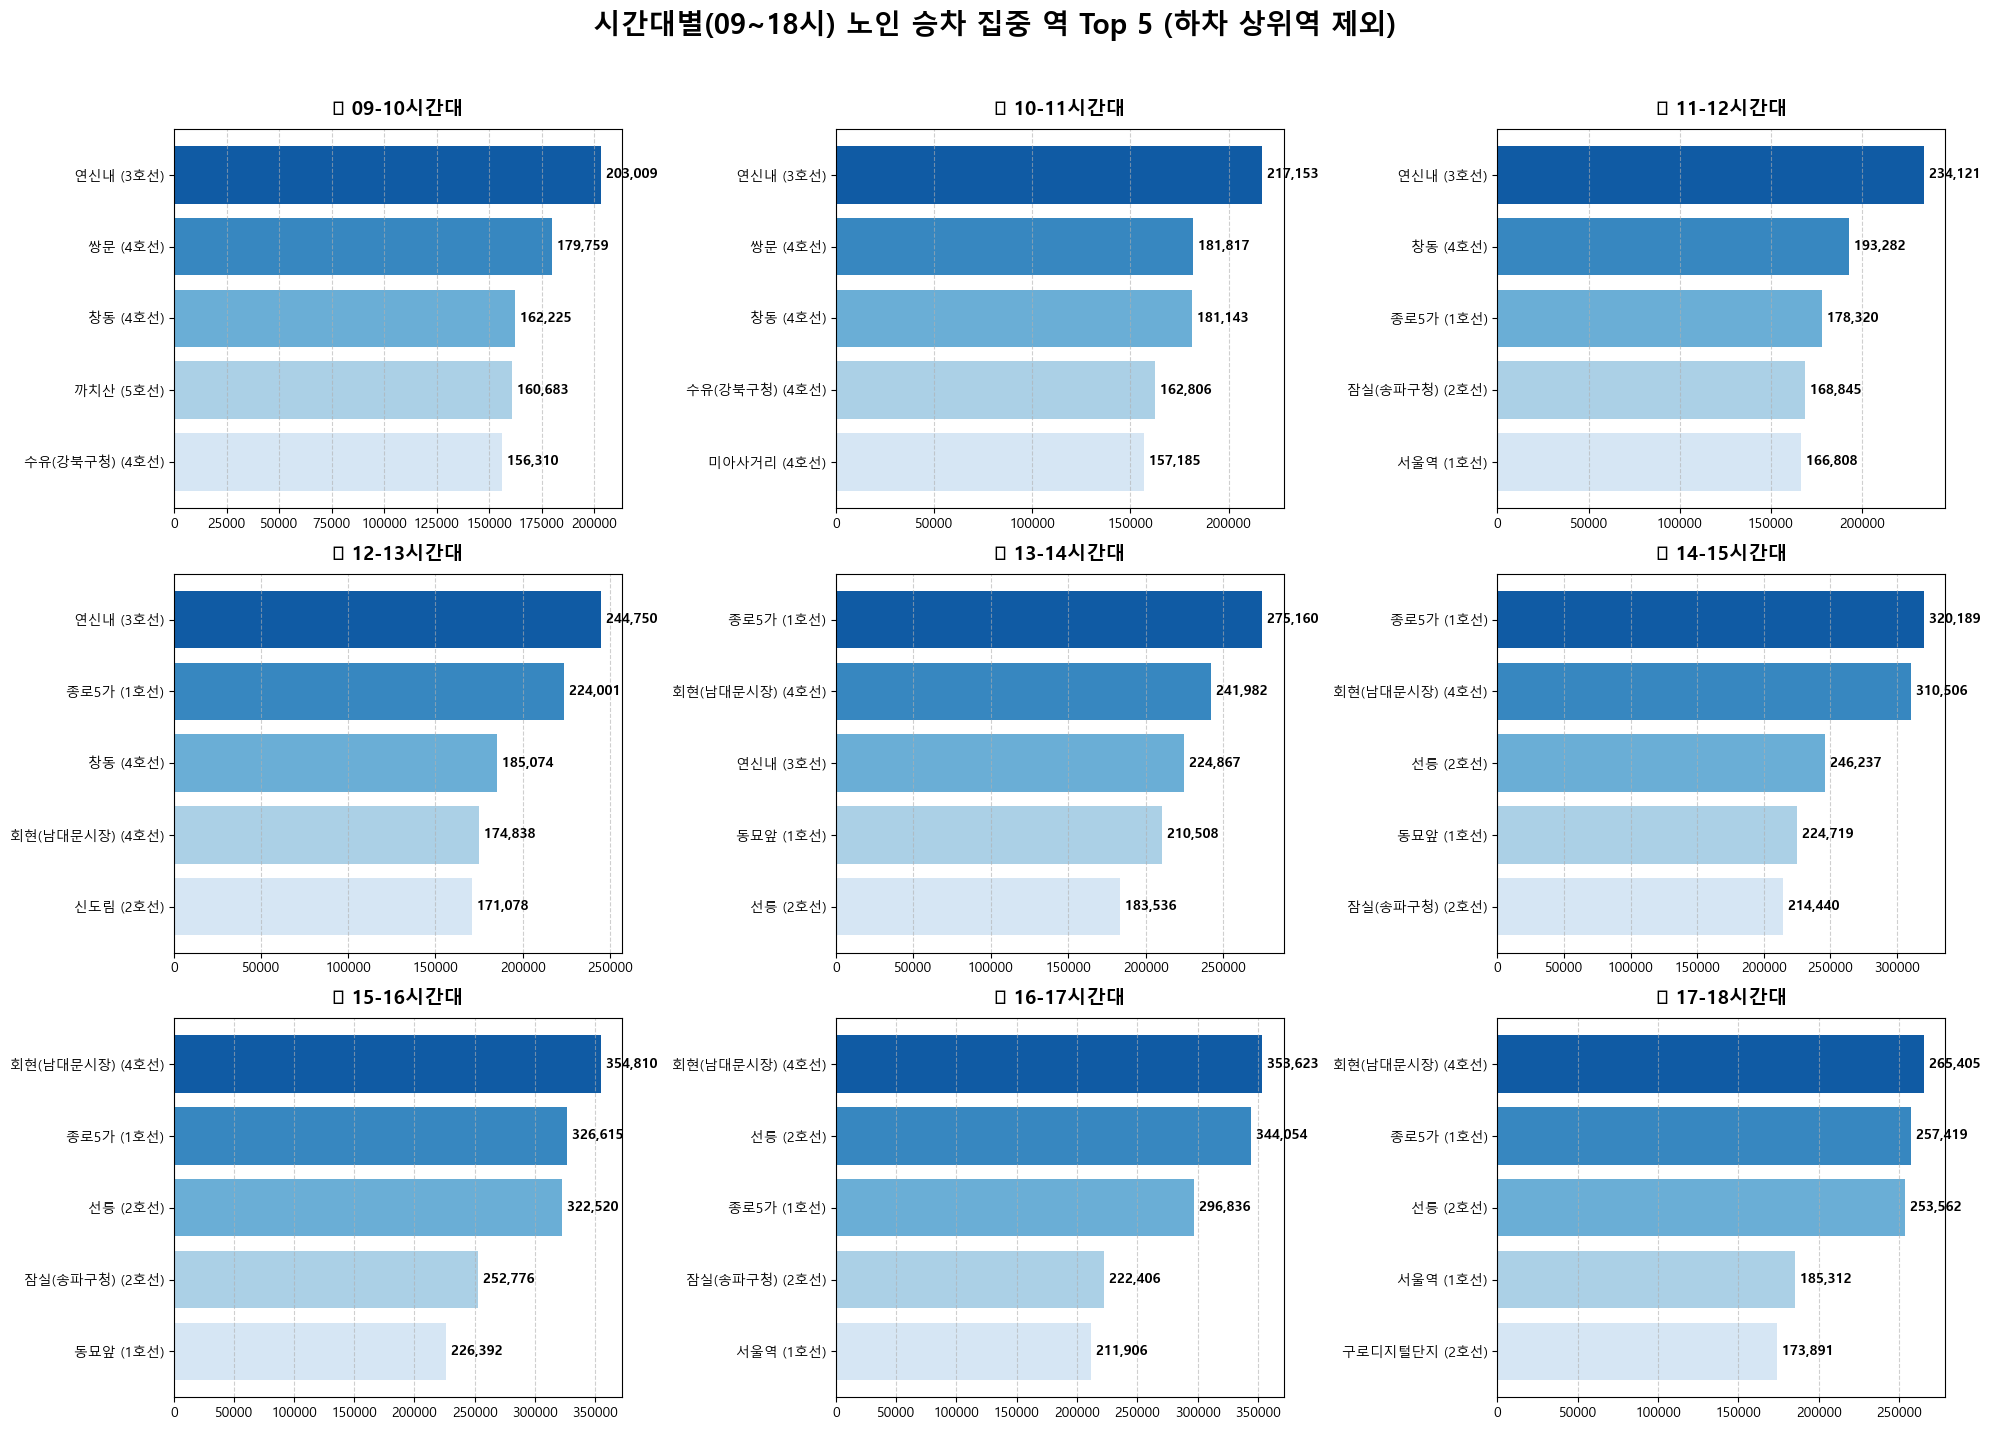

In [8]:


# 분석할 시간대 리스트 (컬럼명 확인)
time_cols = [
    '09-10시간대', '10-11시간대', '11-12시간대', 
    '12-13시간대', '13-14시간대', '14-15시간대', 
    '15-16시간대', '16-17시간대', '17-18시간대'
]

# -------------------- 2. 데이터 전처리 (호선 생성 포함) --------------------
df = senior24_df.copy()

# [중요] 호선 구분 함수 다시 정의 (이 부분이 빠져서 에러가 났었습니다)
def get_line_number(station_id):
    try: sid = str(int(station_id))
    except: return '기타'
    if 150 <= int(sid) <= 159: return '1호선'
    if 200 <= int(sid) <= 299: return '2호선'
    if 300 <= int(sid) <= 399: return '3호선'
    if 400 <= int(sid) <= 499: return '4호선'
    if 2500 <= int(sid) <= 2599: return '5호선'
    if 2600 <= int(sid) <= 2699: return '6호선'
    if 2700 <= int(sid) <= 2799: return '7호선'
    if 2800 <= int(sid) <= 2899: return '8호선'
    return '기타'

# '호선' 컬럼 생성
df['호선'] = df['역번호'].apply(get_line_number)

# 시간대 데이터 숫자 변환
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# -------------------- 3. 제외 대상 선정 및 필터링 --------------------
# (1) 낮 시간 합계 계산
df['낮_합계'] = df[time_cols].sum(axis=1)

# (2) '하차' 기준 상위 5개 역 선정 (제외할 역)
exclude_list = df[df['승하차구분'] == '하차'].groupby('역명')['낮_합계'].sum() \
               .sort_values(ascending=False).head(5).index.tolist()

print(f"🚫 분석 제외(하차 Top 5): {exclude_list}")

# (3) '승차' 데이터이면서 + '제외 역'이 아닌 데이터만 추출
df_target = df[
    (df['승하차구분'] == '승차') & 
    (~df['역명'].isin(exclude_list))
].copy()

# -------------------- 4. 시각화 (3x3 서브플롯) --------------------
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('시간대별(09~18시) 노인 승차 집중 역 Top 5 (하차 상위역 제외)', 
             fontsize=20, fontweight='bold', y=0.95)

axes_flat = axes.flatten() 

for idx, time_col in enumerate(time_cols):
    ax = axes_flat[idx] 
    
    # 해당 시간대 역별 합계 구하기 (이제 '호선' 컬럼이 있어서 에러가 안 납니다)
    rank_data = df_target.groupby(['역명', '호선'])[time_col].sum().reset_index()
    
    # Top 5 추출
    top5 = rank_data.sort_values(by=time_col, ascending=True).tail(5)
    
    # 라벨 만들기
    top5['Label'] = top5['역명'] + " (" + top5['호선'] + ")"
    
    # 그래프 그리기
    bars = ax.barh(top5['Label'], top5[time_col], color=sns.color_palette("Blues", n_colors=5))
    
    # 디자인
    ax.set_title(f"⏰ {time_col}", fontweight='bold', fontsize=14, pad=10)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # 수치 표시
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f' {int(width):,}', 
                va='center', fontweight='bold', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93]) 
plt.show()

📢 [시간대별 제외된 하차 Top 5 목록]
------------------------------------------------------------
⏰ 09-10시간대 제외 역: ['동대문', '선릉', '노원', '서울역', '종로5가']
⏰ 10-11시간대 제외 역: ['동대문', '제기동', '회현(남대문시장)', '종로5가', '고속터미널']
⏰ 11-12시간대 제외 역: ['사당', '종로3가', '제기동', '회현(남대문시장)', '잠실(송파구청)']
⏰ 12-13시간대 제외 역: ['종로3가', '제기동', '사당', '청량리(서울시립대입구)', '동대문']
⏰ 13-14시간대 제외 역: ['제기동', '청량리(서울시립대입구)', '종로3가', '동묘앞', '고속터미널']
⏰ 14-15시간대 제외 역: ['제기동', '청량리(서울시립대입구)', '고속터미널', '잠실(송파구청)', '종로3가']
⏰ 15-16시간대 제외 역: ['청량리(서울시립대입구)', '제기동', '잠실(송파구청)', '노원', '고속터미널']
⏰ 16-17시간대 제외 역: ['사당', '잠실(송파구청)', '노원', '연신내', '청량리(서울시립대입구)']
⏰ 17-18시간대 제외 역: ['사당', '연신내', '잠실(송파구청)', '노원', '창동']
------------------------------------------------------------


C:\Users\dbsdm\AppData\Local\Temp\ipykernel_14780\2394563377.py:81: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.

c:\Users\dbsdm\anaconda\envs\y38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.



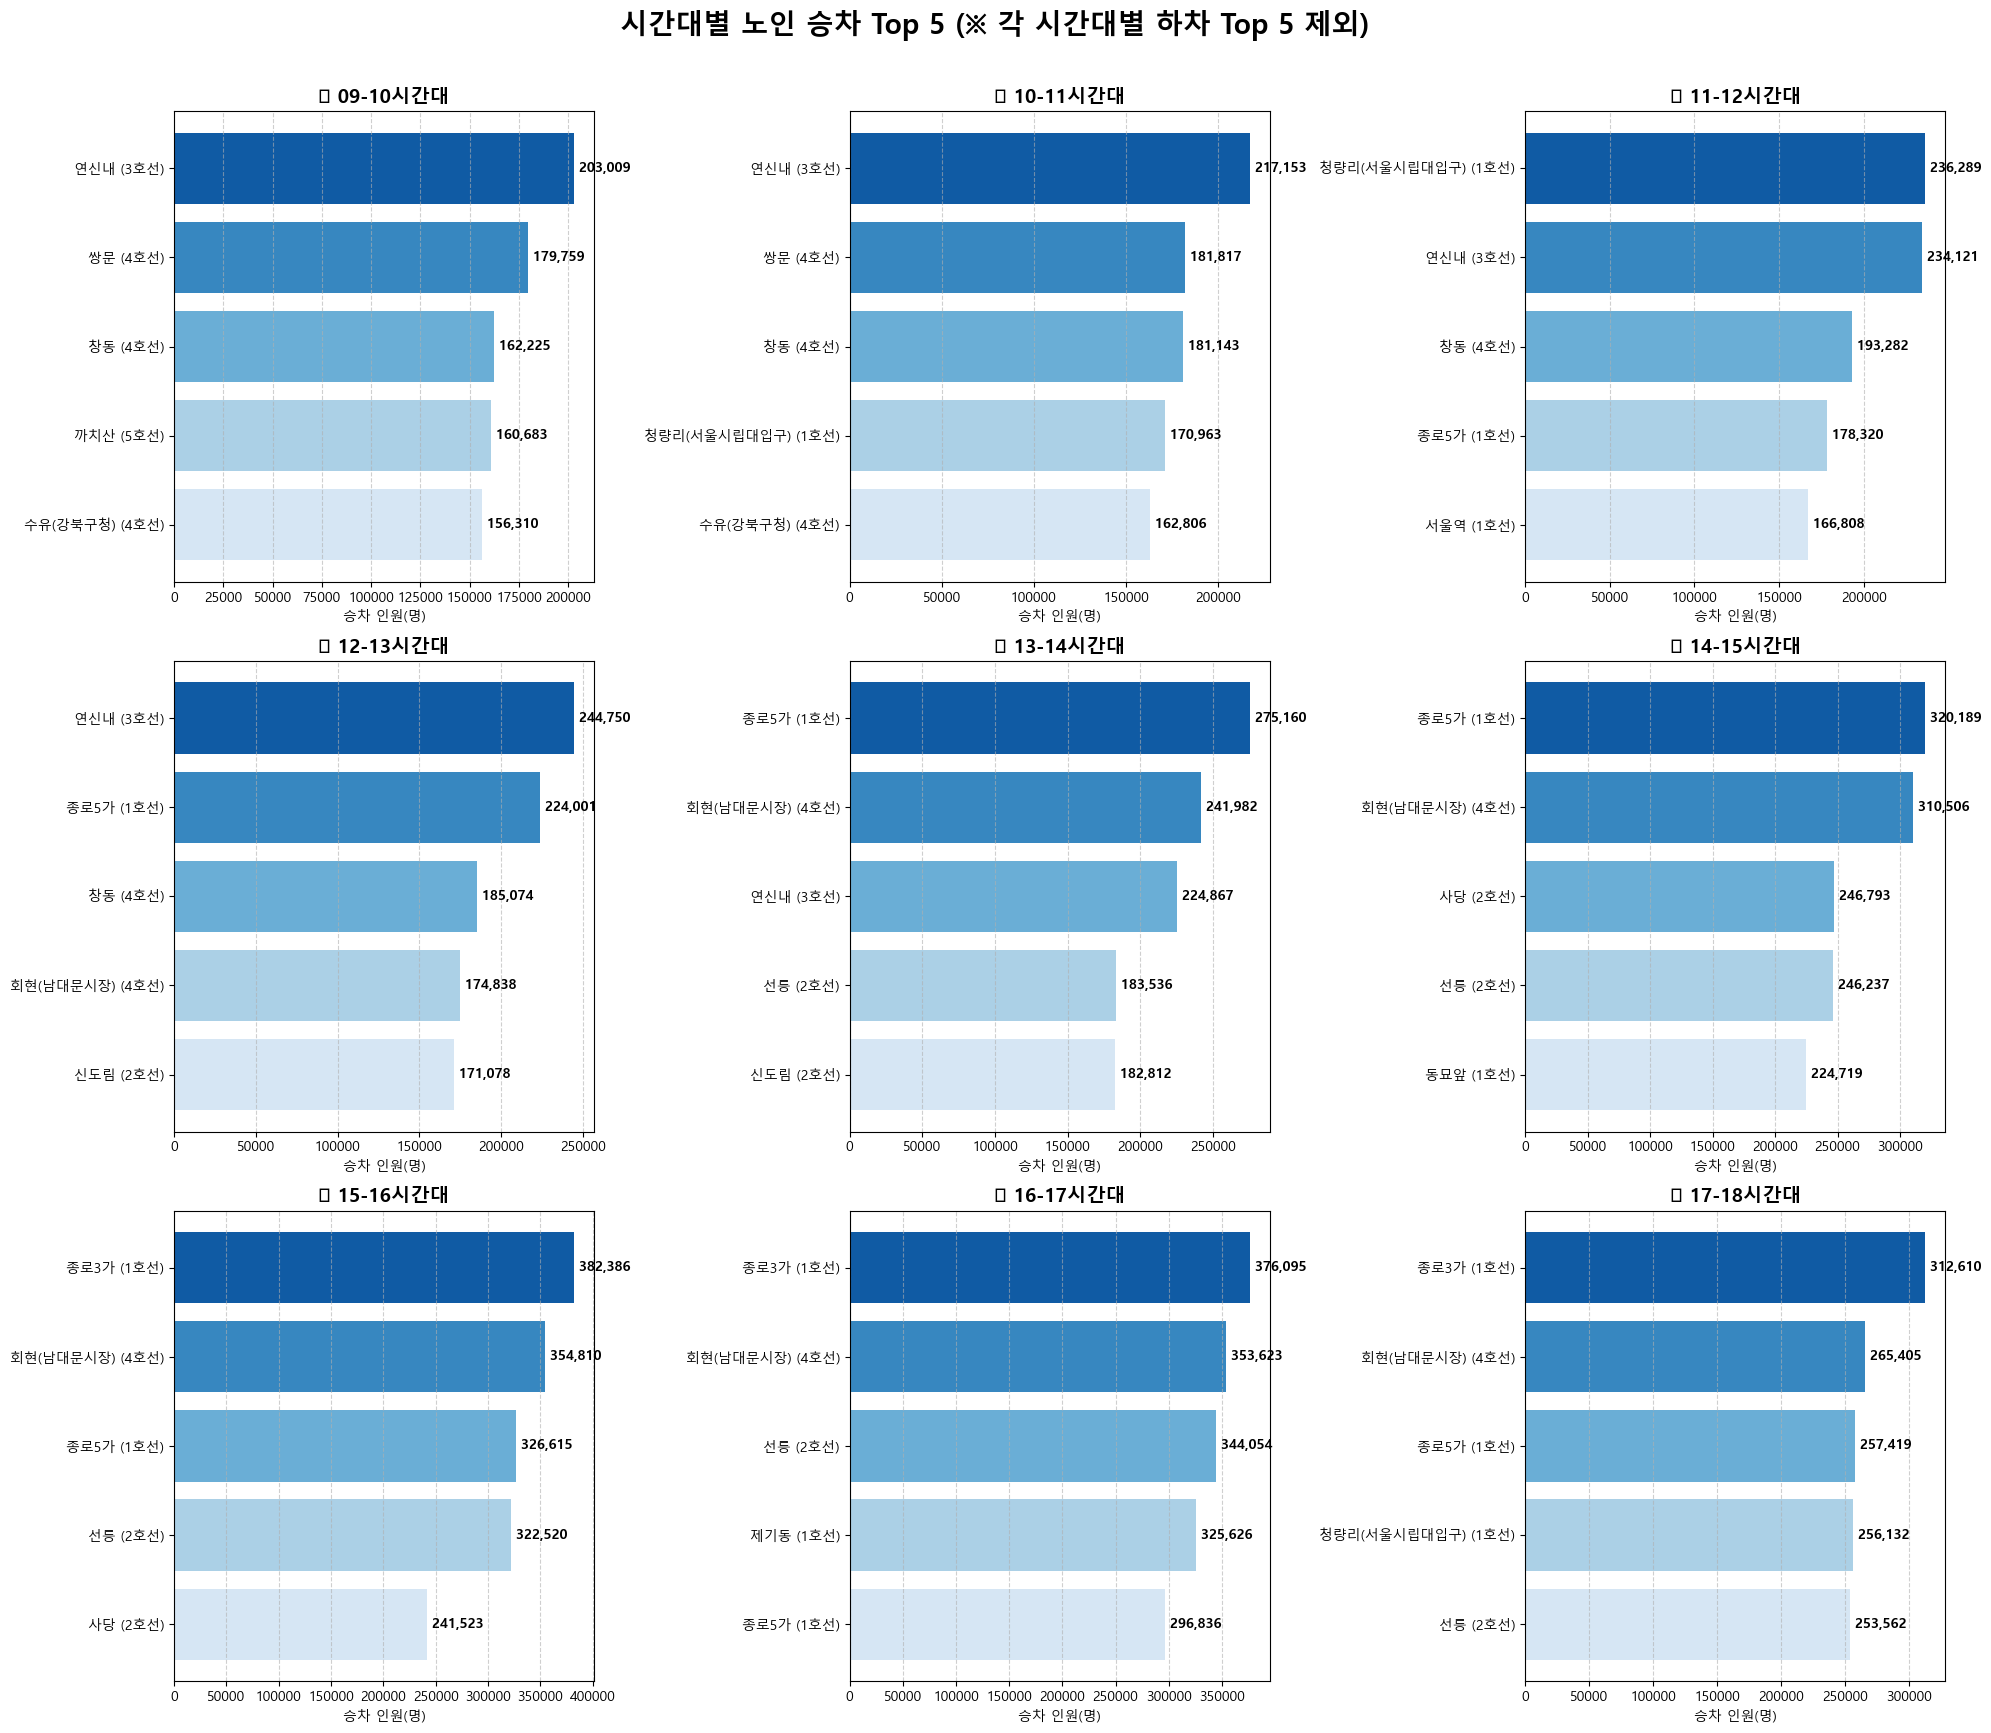

In [9]:

# 분석할 시간대 리스트
time_cols = [
    '09-10시간대', '10-11시간대', '11-12시간대', 
    '12-13시간대', '13-14시간대', '14-15시간대', 
    '15-16시간대', '16-17시간대', '17-18시간대'
]

# -------------------- 2. 데이터 전처리 --------------------
df = senior24_df.copy()

# 호선 구분 함수
def get_line_number(station_id):
    try: sid = str(int(station_id))
    except: return '기타'
    if 150 <= int(sid) <= 159: return '1호선'
    if 200 <= int(sid) <= 299: return '2호선'
    if 300 <= int(sid) <= 399: return '3호선'
    if 400 <= int(sid) <= 499: return '4호선'
    if 2500 <= int(sid) <= 2599: return '5호선'
    if 2600 <= int(sid) <= 2699: return '6호선'
    if 2700 <= int(sid) <= 2799: return '7호선'
    if 2800 <= int(sid) <= 2899: return '8호선'
    return '기타'

df['호선'] = df['역번호'].apply(get_line_number)

# 숫자 변환
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# -------------------- 3. 시간대별 분석 및 시각화 Loop --------------------
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('시간대별 노인 승차 Top 5 (※ 각 시간대별 하차 Top 5 제외)', 
             fontsize=20, fontweight='bold', y=0.96)

axes_flat = axes.flatten()

print("📢 [시간대별 제외된 하차 Top 5 목록]")
print("-" * 60)

for idx, time_col in enumerate(time_cols):
    ax = axes_flat[idx]
    
    # 1) [핵심] 해당 시간대의 '하차' Top 5 찾기
    top5_off_stations = df[df['승하차구분'] == '하차'].groupby('역명')[time_col].sum() \
                        .nlargest(5).index.tolist()
    
    # 콘솔에 제외된 역 출력 (검증용)
    print(f"⏰ {time_col} 제외 역: {top5_off_stations}")
    
    # 2) 해당 시간대 승차 데이터 필터링 (위에서 찾은 5개 역 제외)
    #    승차 데이터만 선택 -> 역명이 제외 리스트에 없는 것만 선택
    target_df = df[
        (df['승하차구분'] == '승차') & 
        (~df['역명'].isin(top5_off_stations))
    ]
    
    # 3) 승차 Top 5 선정
    top5_on = target_df.groupby(['역명', '호선'])[time_col].sum().reset_index() \
              .sort_values(by=time_col, ascending=True).tail(5) # 그래프용 오름차순
    
    # 4) 그래프 그리기
    top5_on['Label'] = top5_on['역명'] + " (" + top5_on['호선'] + ")"
    
    bars = ax.barh(top5_on['Label'], top5_on[time_col], color=sns.color_palette("Blues", n_colors=5))
    
    # 디자인
    ax.set_title(f"⏰ {time_col}", fontweight='bold', fontsize=14)
    ax.set_xlabel("승차 인원(명)")
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # 수치 표시
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f' {int(width):,}', 
                va='center', fontweight='bold', fontsize=10)

print("-" * 60)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\dbsdm\AppData\Local\Temp\ipykernel_14780\3936212180.py:82: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.

c:\Users\dbsdm\anaconda\envs\y38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.



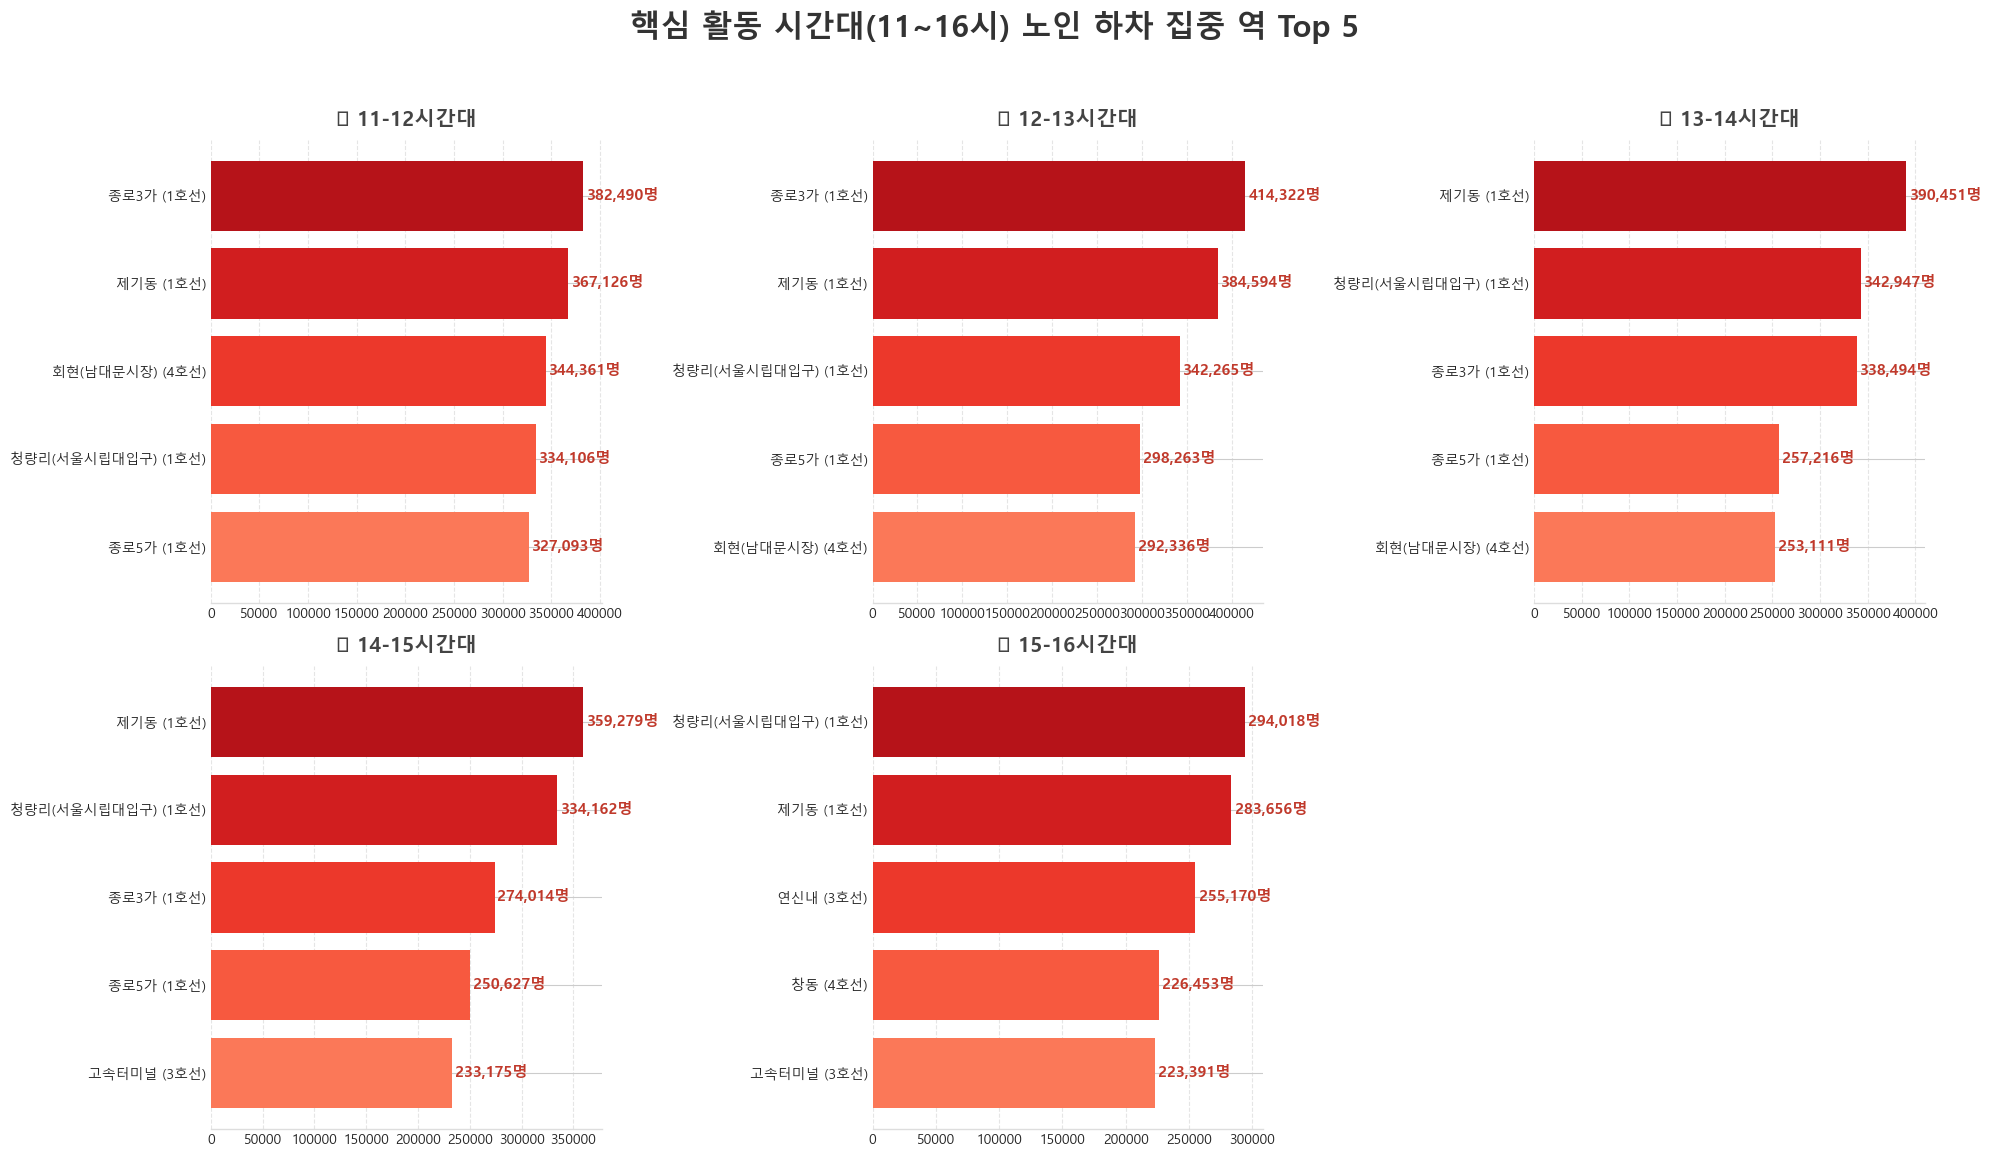

In [20]:

# 분석할 시간대 (11시 ~ 16시)
target_times = [
    '11-12시간대', '12-13시간대', '13-14시간대', 
    '14-15시간대', '15-16시간대'
]

# -------------------- 2. 데이터 전처리 --------------------
df = senior24_df.copy()

# 호선 구분 함수
def get_line_number(station_id):
    try: sid = str(int(station_id))
    except: return '기타'
    if 150 <= int(sid) <= 159: return '1호선'
    if 200 <= int(sid) <= 299: return '2호선'
    if 300 <= int(sid) <= 399: return '3호선'
    if 400 <= int(sid) <= 499: return '4호선'
    if 2500 <= int(sid) <= 2599: return '5호선'
    if 2600 <= int(sid) <= 2699: return '6호선'
    if 2700 <= int(sid) <= 2799: return '7호선'
    if 2800 <= int(sid) <= 2899: return '8호선'
    return '기타'

df['호선'] = df['역번호'].apply(get_line_number)

# 숫자 변환 및 하차 데이터 필터링
for col in target_times:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# '하차' 데이터만 추출
df_off = df[df['승하차구분'] == '하차'].copy()

# -------------------- 3. 시각화 (Subplots) --------------------
# 2행 3열 그리드 생성 (총 6칸 중 5칸 사용)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.patch.set_facecolor('white') # 전체 배경 흰색

# 전체 제목
fig.suptitle('핵심 활동 시간대(11~16시) 노인 하차 집중 역 Top 5', 
             fontsize=22, fontweight='bold', color='#333333', y=0.96)

axes_flat = axes.flatten() # 루프 돌리기 쉽게 평탄화

for idx, time_col in enumerate(target_times):
    ax = axes_flat[idx]
    
    # 1) 해당 시간대 역별 합계 구하기
    ranked = df_off.groupby(['역명', '호선'])[time_col].sum().reset_index()
    
    # 2) Top 5 추출 (그래프용 오름차순 정렬)
    top5 = ranked.sort_values(by=time_col, ascending=True).tail(5)
    
    # 3) 라벨 생성
    top5['Label'] = top5['역명'] + " (" + top5['호선'] + ")"
    
    # 4) 가로 막대 그래프 그리기 (붉은색 그라데이션 적용)
    # 하위권은 연하게, 상위권(1위)은 진하게
    bars = ax.barh(top5['Label'], top5[time_col], 
                   color=sns.color_palette("Reds", n_colors=10)[4:]) 
    
    # 5) 디자인 꾸미기
    ax.set_title(f"⏰ {time_col}", fontweight='bold', fontsize=15, pad=10, color='#444444')
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#dddddd')
    
    # 6) 막대 옆에 수치 표시
    for bar in bars:
        width = bar.get_width()
        ax.text(width + (width * 0.01), bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}명', 
                va='center', fontweight='bold', fontsize=11, color='#c0392b')

# 마지막 6번째 칸은 비어있으므로 숨김 처리 (5개 시간대만 그리기 때문)
if len(target_times) < len(axes_flat):
    for i in range(len(target_times), len(axes_flat)):
        axes_flat[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.93]) # 제목 공간 확보
plt.show()